# Instructions
- Before running the jupyter notebook, don't forget to copy it into your drive **(`File` => `Save a copy in Drive`)**. *Failing to do this step may result in losing the progress of your code.*
- Change your resource type to GPU before progressing **(`Runtime` => `Change runtime time` => `T4 GPU`).**
- There are six steps for this exercise (including step 0, the preperation step). You will complete the the code blocks denoted by **`TODO:`**.

# Step 0: Preperation

**Step 0.1:** Install dependency
- This step could take a while.

**Step 0.2:** Mount data and files to your drive (optional).
- This is useful if you want to save your model weights, etc.
- You will see a few popup windows asking for your authorization for this notebook to access your Google Drive files. You need to say yes to all of them.

In [3]:
# Step 0.2: Mount data and files to your drive (optional).
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Step 0.1: Install dependency and download codebase
%pip install torch transformers datasets tqdm matplotlib
!mkdir checkpoints

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Step 1: Defining PyTorch Dataset and Dataloader

First, you will implement a dataset class (named `SST2Dataset`) for processing the SST-2 dataset. You can find details of the basics of Dataset and Dateloader in this [tutorial](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html).

We defined the `SST2Example` class for you, which is used to convert a dict of raw data into an SST2Example object that contains a text and label.

In [4]:
# Load necessary packages
from dataclasses import dataclass
from typing import List, Tuple

import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from transformers import PreTrainedTokenizerFast, AutoTokenizer
from datasets import load_dataset

######################################################
#  The following code is given to you.
######################################################

@dataclass
class SST2Example:
    """
    Convert a dict of raw data into an SST2Example object that contains a text and label.
    If you're interested, you can find descriptions of dataclass at https://docs.python.org/3/library/dataclasses.html
    """
    text: str
    label: int  # 0 for negative, 1 for positive

    @staticmethod
    def from_dict(data: dict):
        text = data['text']
        label = data['label']

        return SST2Example(
            text=text,
            label=label,
        )


def initialize_datasets(tokenizer: PreTrainedTokenizerFast) -> dict:
    """
    Initialize the dataset objects for all splits based on the raw data.
    :param tokenizer: A tokenizer used to prepare the inputs for a model (see details in https://huggingface.co/docs/transformers/main_classes/tokenizer).
    :return: A dictionary of the dataset splits.
    """
    raw_data = load_dataset("gpt3mix/sst2")
    split_datasets = {}

    for split_name in raw_data.keys():
        split_data = list(raw_data[split_name])

        split_datasets[split_name] = SST2Dataset(tokenizer, split_data)

    return split_datasets

## **Coding Exercises** for Step 1:
Below, we provide a skeleton for creating a SST-3 Dataset object. **You will complete the following code blocks denoted by `TODO:`.**  
You can read more about `PreTrainedTokenizerFast` [here](https://huggingface.co/docs/transformers/main_classes/tokenizer#transformers.PreTrainedTokenizerFast.__call__) (e.g., why do we set `padding`, `max_length`, `truncation`, and `return_tensors` to the values provided below).

In [5]:
class SST2Dataset(Dataset):
    """
    Create a customized dataset object for SST-2.
    A custom Dataset class must implement three functions: __init__, __len__, and __getitem__.
    You can find a detailed tutorial on Dataset at https://pytorch.org/tutorials/beginner/basics/data_tutorial.html.
    """
    tokenizer: PreTrainedTokenizerFast = None

    def __init__(self, tokenizer: PreTrainedTokenizerFast, raw_data_list: List[dict]):
        SST2Dataset.tokenizer = tokenizer
        self.sample_list = [SST2Example.from_dict(data) for data in raw_data_list]

    def __len__(self):
        """
        Get the number of items in the dataset.
        """
        # TODO: return the number of samples in sample_list.
        return len(self.sample_list)

    def __getitem__(self, idx):
        """
        Get the idx-th item from the dataset.
        """
        # TODO: return the idx-th item in sample_list.
        return self.sample_list[idx]

    def __iter__(self):
        """
        Get an iterator for the dataset.
        """
        # TODO: return an iterator for sample_list.
        return iter(self.sample_list)

    @staticmethod
    def collate_fn(batched_samples: List[SST2Example]) -> dict:
        """
        Encode samples in batched_samples: tokenize the input texts, and turn labels into a tensor.
        :param batched_samples: A list of SST2Example samples.
        :return: A dictionary of encoded texts and their corresponding labels (in tensors).
        """
        # TODO: collect all input texts from batched_samples into a list.
        batched_text = [item.text for item in batched_samples]

        # TODO: collect all labels from batched_samples into a list.
        batched_label = [item.label for item in batched_samples]

        # Tokenize the input texts.
        text_encoding = SST2Dataset.tokenizer(batched_text,
                                              padding=True,
                                              max_length=512,
                                              truncation=True,
                                              return_tensors="pt")

        # TODO: convert data type of the labels to torch.long (Hint: using torch.LongTensor).
        label_encoding = torch.LongTensor(batched_label)

        # TODO: return dictionary of encoded texts and labels.
        return {**text_encoding, 'labels': label_encoding}

# Step 2: Loading Data
Here, you will load the data using the Dataloader of the dataset you built from the previous step.

## **Coding Exercises** for Step 2:
You will complete the following code blocks denoted by `TODO:`.

In [ ]:
"""
Load train / validation / test dataset, using `initialize_datasets` in `dataset.py`.
"""
# TODO: load pre-trained tokenizer for roberta-base from transformers library.
# See more examples here: https://huggingface.co/docs/transformers/v4.37.0/en/model_doc/roberta#transformers.RobertaForSequenceClassification.forward.example
tokenizer = AutoTokenizer.from_pretrained("roberta-base")

# TODO: load datasets using initialize_datasets.
datasets = initialize_datasets(tokenizer)

# TODO: get the first data point in your validation dataset.
# Hint: (for you to debug) you returned data point should look like `SST2Example(text="It 's a lovely ...", label=0)`
val_first_element = datasets['validation'][0]

# TODO: get the length of train, validation, and test datasets using `datasets` variable.
length_train = len(datasets['train'])
length_val = len(datasets['validation'])
length_test = len(datasets['test'])

"""
To load batch of samples from `torch.Dataset` during training / inference, we use `DataLoader` class.
Below, we provide an example of loading a dataloader for the validation split of SST-2.
"""
validation_dataloader = DataLoader(datasets['validation'],
                                   batch_size=64,
                                   shuffle=False,
                                   collate_fn=SST2Dataset.collate_fn,
                                   num_workers=2)

# TODO: load the first batch of samples from the validation dataset
# Hint: use iterator!
batch = next(iter(validation_dataloader))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

sst2.py:   0%|          | 0.00/1.70k [00:00<?, ?B/s]

default%2Ftrain%2F0000.parquet:   0%|          | 0.00/523k [00:00<?, ?B/s]

default%2Fvalidation%2F0000.parquet:   0%|          | 0.00/67.7k [00:00<?, ?B/s]

default%2Ftest%2F0000.parquet:   0%|          | 0.00/138k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/6920 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

# Step 3: Training and Evaluation

In [7]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.optim import Optimizer, AdamW
from tqdm.notebook import tqdm
from transformers import AutoTokenizer, AutoModelForSequenceClassification

## **Coding Exercises** for Step 3:
Here, we provide a skeleton for two functions, `train_one_epoch` and `evaluate`. **You will complete code blocks denoted by `TODO:`.**  
You can learn more about optimizers and the basic structure of a training loop in [this tutorial](https://pytorch.org/tutorials/beginner/introyt/trainingyt.html).

In [ ]:
def train_one_epoch(model: nn.Module, dataloader: DataLoader, optimizer: Optimizer, epoch: int):
    """
    Train the model for one epoch.
    :param model: A pre-trained model loaded from transformers. (e.g., RobertaForSequenceClassification https://huggingface.co/docs/transformers/v4.37.0/en/model_doc/roberta#transformers.RobertaForSequenceClassification)
    :param dataloader: A train set dataloader for SST2Dataset.
    :param optimizer: An instance of Pytorch optimizer. (e.g., AdamW https://pytorch.org/docs/stable/generated/torch.optim.AdamW.html)
    :param epoch: An integer denoting current epoch.
    Trains model for one epoch.
    """
    # TODO: set the model to the training mode.
    model.train()

    with tqdm(dataloader, desc=f"Train Ep {epoch}", total=len(dataloader)) as tq:
        for batch in tq:
            # TODO: retrieve the data from your batch and send it to the same device as your model (i.e., model.device).
            # Hint: model.device should point to 'cuda' as you set it as such in the main function below.
            #       However, please use `model.device` and don't hard code it to 'cuda' as the auto-grader will put the model on CPU.
            data = {key: value for key, value in batch.items()}
            for key, value in data.items():
                data[key] = value.to(model.device)

            # TODO: Compute loss by running model with text_encoding and label_encoding.
            loss = model(**data).loss

            # TODO: compute gradients and update parameters using optimizer.
            # Hint: you need three lines of code here!
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()


            # tq.set_postfix({"loss": loss.detach().item()}) # for printing better-looking progress bar

In [ ]:
def evaluate(model: nn.Module, dataloader: DataLoader) -> float:
    """
    Evaluate model on the dataloader and compute the accuracy.
    :param model: A language model loaded from transformers. (e.g., RobertaForSequenceClassification https://huggingface.co/docs/transformers/v4.37.0/en/model_doc/roberta#transformers.RobertaForSequenceClassification)
    :param dataloader: A validation / test set dataloader for SST2Dataset
    :return: A floating number representing the accuracy of model in the given dataset.
    """
    # TODO: set the model to the evaluation mode.
    model.eval()

    all_predictions = []
    all_labels = []
    with tqdm(dataloader, desc=f"Eval", total=len(dataloader)) as tq:
        for batch in tq:
            with torch.no_grad():
                # TODO: retrieve the data from your batch and send it to the same device as your model (i.e., model.device).
                # Hint: model.device should point to 'cuda' as you set it as such in the main function below.
                #       However, please use `model.device` and don't hard code it to 'cuda' as the auto-grader will put the model on CPU.
                data = {key: value for key, value in batch.items()}

                for key, value in data.items():
                    data[key] = value.to(model.device)

                # TODO: inference with model and compute logits.
                # logits = model(**data).logits
                # Hint: logit should be of size (batch_size, 2)
                logits = model(**data).logits

                # TODO: compute list of predictions and list of labels for the current batch
                predictions = logits.argmax(dim=-1).tolist()
                # Hint: should be a list [0, 1, ...] of predicted labels
                labels = data['labels'].tolist()
                # Hint: should be a list [0, 1, ...] of ground-truth labels

                all_predictions += predictions
                all_labels += labels

    # compute accuracy
    all_predictions = torch.Tensor(all_predictions)
    all_labels = torch.Tensor(all_labels)
    accuracy = compute_accuracy(all_predictions, all_labels)

    print(f"Accuracy: {accuracy}")
    return accuracy


def compute_accuracy(predictions: torch.Tensor, labels: torch.Tensor) -> float:
    """
    Given two tensors predictions and labels, compute the accuracy.
    :param predictions: torch.Tensor of size (N,)
    :param labels: torch.Tensor of size (N,)
    :return: A floating number representing the accuracy
    """
    assert predictions.size(-1) == labels.size(-1)

    # TODO: compute accuracy (MSE)
    accuracy = sum(pred == label for pred, label in zip(predictions, labels))

    return accuracy/len(predictions)

# Step 4: Main Training Loop

The main function uses all the functions implemented above to learn a model for certain number of epochs and evaluate it. Read through the comments and implement `main` that fine-tunes the RoBERTa-based on SST-2.

## **Coding Exercises** for Step 4:
Here, we provide a skeleton for the `main` function. **You will complete code blocks denoted by `TODO:`.**

In [ ]:
torch.manual_seed(64)

def main():

    # hyper-parameters (we provide initial set of values here, but you can modify them.)
    batch_size = 64
    learning_rate = 5e-5
    num_epochs = 10
    model_name = "roberta-base"

    # TODO: load pre-trained model and corresponding tokenizer (given model_name above).
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

    # load model on GPU.
    model = model.cuda()

    # TODO: initialize the AdamW optimizer with optional arguments: lr=learning_rate, eps=1e-8
    optimizer = AdamW(model.parameters(), lr=learning_rate, eps=1e-8)

    # TODO: load datasets.
    datasets = initialize_datasets(tokenizer)

    # TODO: initialize that training and evaluation (validation / test) dataloaders.
    # Hint: you should use the validation dataset during hyperparameter tuning,
    # and evaluate the model on the test set once after you finalize the design choice of your model.
    # Hint: you should shuffle the training data, but not the validation data.
    train_dataloader = DataLoader(datasets['train'],
                                  batch_size=batch_size,
                                  shuffle=True,
                                  collate_fn=SST2Dataset.collate_fn,
                                  num_workers=2)
    validation_dataloader = DataLoader(datasets['validation'],
                                       batch_size=batch_size,
                                       shuffle=False,
                                       collate_fn=SST2Dataset.collate_fn,
                                       num_workers=2)

    # save the accuracy list to graph train and test
    train_acc_list = []
    val_acc_list = []

    # training loop.
    best_acc = 0.0
    for epoch in range(1, num_epochs + 1):
        train_one_epoch(model, train_dataloader, optimizer, epoch)

        # train_acc = evaluate(model, train_dataloader)
        valid_acc = evaluate(model, validation_dataloader)

        # train_acc_list.append(train_acc)
        val_acc_list.append(valid_acc)

        # TODO: if the newly trained model checkpoint is better than the previously
        # saved checkpoint, save the new model in `./checkpoints` folder.

        # Hint: remember to update best_acc to the accuracy of the best model so far.
        if valid_acc > best_acc:
            best_acc = valid_acc
            torch.save(model.state_dict(), './checkpoints/best_model.pt')


    # graph all epochs
    plt.figure(figsize=(10, 5))
    plt.title(f'Train and Validation for batch: {batch_size}, lambda: {learning_rate}')
    plt.plot(train_acc_list, label='train', color="blue")
    plt.plot(val_acc_list, label='validation',color="red")
    plt.xticks(range(num_epochs))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()


------------------------| batch size: 64, learning rate: 6e-05, epochs: 10 |------------------------------------


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Train Ep 1:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9309248328208923


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.8876146674156189


Train Ep 2:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9638728499412537


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9082568883895874


Train Ep 3:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9880057573318481


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9082568883895874


Train Ep 4:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9861271381378174


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9151375889778137


Train Ep 5:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9936416149139404


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9048165082931519


Train Ep 6:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9836705327033997


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9036697149276733


Train Ep 7:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9966763257980347


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9174311757087708


Train Ep 8:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9893063306808472


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9082568883895874


Train Ep 9:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9962427616119385


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9094036817550659


Train Ep 10:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9679190516471863


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.8841742873191833


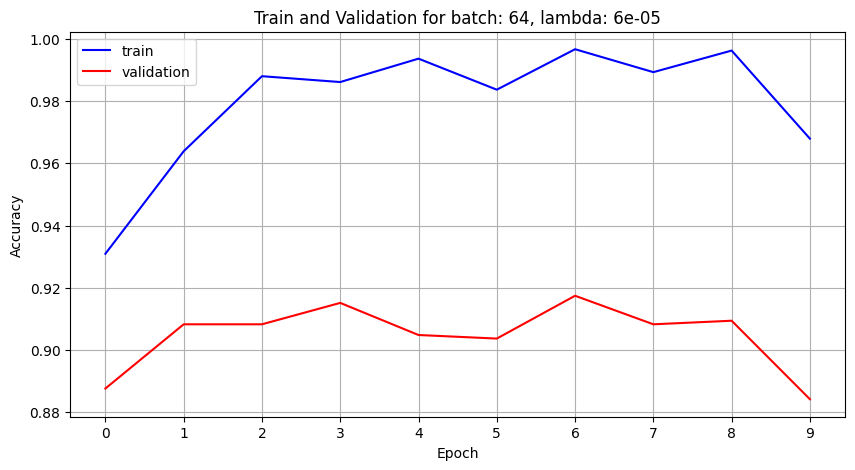

------------------------| batch size: 64, learning rate: 4e-05, epochs: 10 |------------------------------------


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Train Ep 1:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9439306259155273


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9174311757087708


Train Ep 2:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9664739966392517


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9082568883895874


Train Ep 3:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9793352484703064


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9185779690742493


Train Ep 4:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9900289177894592


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9082568883895874


Train Ep 5:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9901733994483948


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9036697149276733


Train Ep 6:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9570809006690979


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.8887614607810974


Train Ep 7:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9911849498748779


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9013761281967163


Train Ep 8:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9975433349609375


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9185779690742493


Train Ep 9:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9979768991470337


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9162843823432922


Train Ep 10:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9955202341079712


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9128440618515015


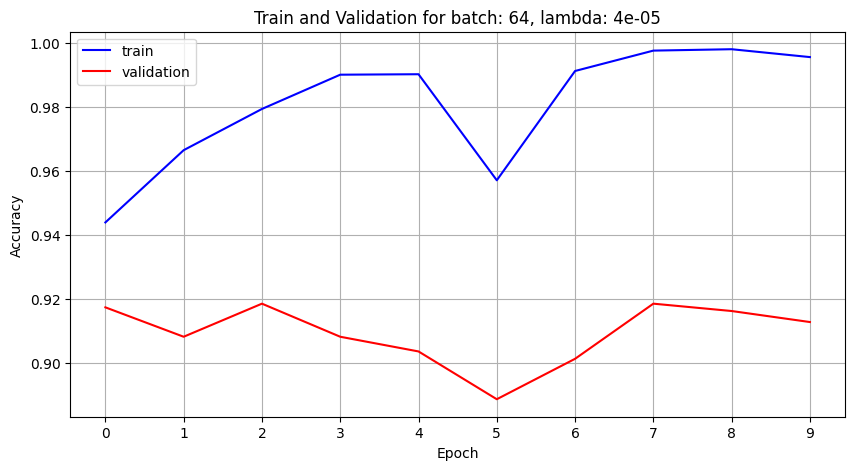

------------------------| batch size: 64, learning rate: 3e-05, epochs: 10 |------------------------------------


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Train Ep 1:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9484103918075562


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.91399085521698


Train Ep 2:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9696531891822815


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.8990825414657593


Train Ep 3:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9800577759742737


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9105504751205444


Train Ep 4:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9764450788497925


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9105504751205444


Train Ep 5:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9940751194953918


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9220183491706848


Train Ep 6:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9878612756729126


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9059633016586304


Train Ep 7:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9949421882629395


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9162843823432922


Train Ep 8:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9976878762245178


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.91399085521698


Train Ep 9:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9971098303794861


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9151375889778137


Train Ep 10:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9969652891159058


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9231651425361633


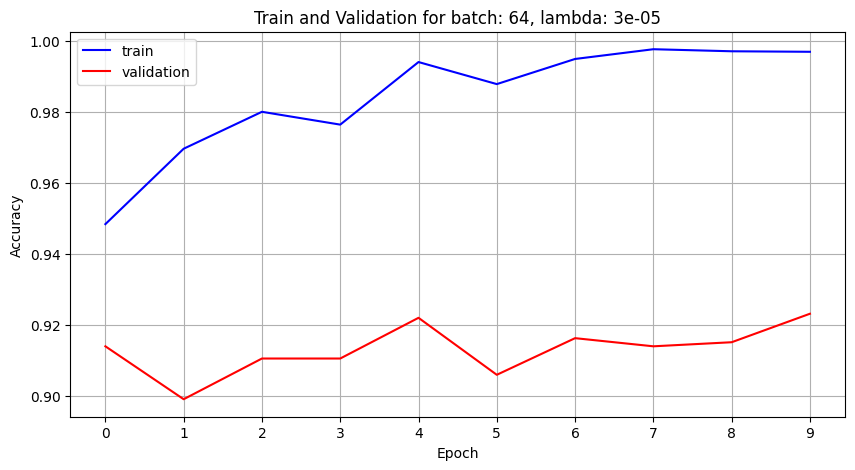

------------------------| batch size: 64, learning rate: 2e-05, epochs: 10 |------------------------------------


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Train Ep 1:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9339595437049866


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9105504751205444


Train Ep 2:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9728323817253113


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9208715558052063


Train Ep 3:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9732658863067627


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9059633016586304


Train Ep 4:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.990606963634491


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9174311757087708


Train Ep 5:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9939306378364563


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9243119359016418


Train Ep 6:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9947977066040039


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9220183491706848


Train Ep 7:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9953756928443909


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9277523159980774


Train Ep 8:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.993208110332489


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9174311757087708


Train Ep 9:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.994508683681488


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9128440618515015


Train Ep 10:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9933525919914246


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9162843823432922


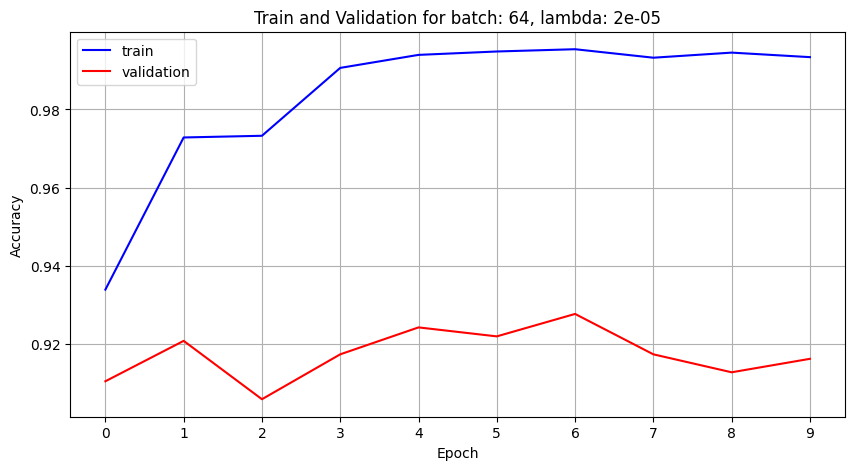

------------------------| batch size: 64, learning rate: 1e-05, epochs: 10 |------------------------------------


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Train Ep 1:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9299132823944092


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9254587292671204


Train Ep 2:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9618496894836426


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9208715558052063


Train Ep 3:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9722543358802795


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9220183491706848


Train Ep 4:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9830924868583679


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9128440618515015


Train Ep 5:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9907514452934265


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9197247624397278


Train Ep 6:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9826589822769165


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9162843823432922


Train Ep 7:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9952312111854553


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9277523159980774


Train Ep 8:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9934971332550049


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9277523159980774


Train Ep 9:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9947977066040039


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.911697268486023


Train Ep 10:   0%|          | 0/109 [00:00<?, ?it/s]

Eval:   0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.9956647157669067


Eval:   0%|          | 0/14 [00:00<?, ?it/s]

Accuracy: 0.9243119359016418


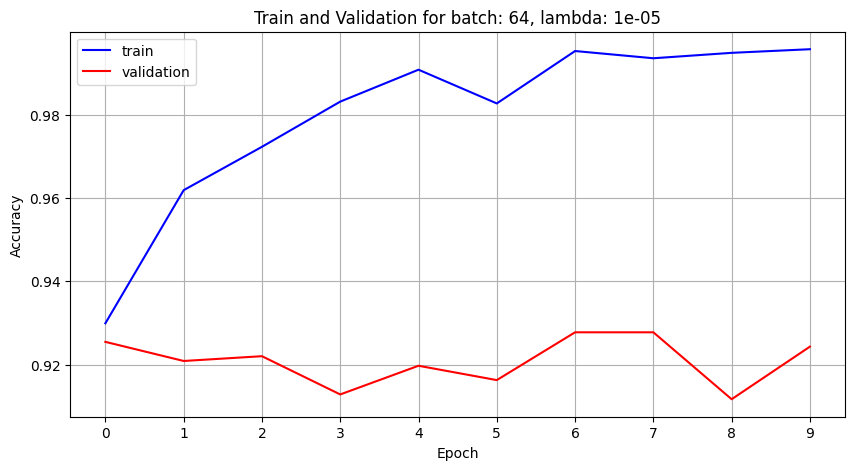

------------------------| batch size: 128, learning rate: 6e-05, epochs: 10 |------------------------------------


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Train Ep 1:   0%|          | 0/55 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [15]:
# Run the main training loop.
# NOTE: if implemented well, each training epoch will take less than 2 minutes.
main()

# # run main with different hyperparameters
# batch_sizes = [64, 128, 256]
# learning_rates = [6e-5, 4e-5, 3e-5, 2e-5, 1e-5]
# epoch = 10

# for size in batch_sizes:
#   for rate in learning_rates:
#     print(f"------------------------| batch size: {size}, learning rate: {rate}, epochs: {epoch} |------------------------------------")
#     main(batch_size=size, learning_rate=rate, num_epochs=epoch)


# Step 5: Testing the Final Model

## **Coding Exercises** for Step 5:
Here, you load your best trained model from `./checkpoints/` and report the test set accuracy. **You will complete the following code blocks denoted by `TODO:`.**



In [ ]:
tokenizer = AutoTokenizer.from_pretrained("roberta-base")

# TODO: Load your best trained model from `./checkpoints/` and report the test set accuracy.
model = AutoModelForSequenceClassification.from_pretrained('./checkpoints/best_model.pt')
model = model.cuda()
batch_size = 64

datasets = initialize_datasets(tokenizer)
# TODO: Load the test dataset
test_dataloader = DataLoader(datasets['test'],
                                  batch_size=batch_size,
                                  shuffle=False,
                                  collate_fn=SST2Dataset.collate_fn)

# TODO: evaluate the model on the test set
test_acc = evaluate(model, test_dataloader)


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-16-8ef237bac060>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowli

Eval:   0%|          | 0/29 [00:00<?, ?it/s]

Accuracy: 0.9467325806617737


------------------------| batch size: 128, learning rate: 2e-05, epochs: 20 |------------------------------------


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Train Ep 1:   0%|          | 0/55 [00:00<?, ?it/s]

Eval:   0%|          | 0/55 [00:00<?, ?it/s]

Accuracy: 0.930202305316925


Eval:   0%|          | 0/7 [00:00<?, ?it/s]

Accuracy: 0.9128440618515015


Train Ep 2:   0%|          | 0/55 [00:00<?, ?it/s]

Eval:   0%|          | 0/55 [00:00<?, ?it/s]

Accuracy: 0.9511560797691345


Eval:   0%|          | 0/7 [00:00<?, ?it/s]

Accuracy: 0.91399085521698


Train Ep 3:   0%|          | 0/55 [00:00<?, ?it/s]

Eval:   0%|          | 0/55 [00:00<?, ?it/s]

Accuracy: 0.9417629837989807


Eval:   0%|          | 0/7 [00:00<?, ?it/s]

Accuracy: 0.8910550475120544


Train Ep 4:   0%|          | 0/55 [00:00<?, ?it/s]

Eval:   0%|          | 0/55 [00:00<?, ?it/s]

Accuracy: 0.9823699593544006


Eval:   0%|          | 0/7 [00:00<?, ?it/s]

Accuracy: 0.9059633016586304


Train Ep 5:   0%|          | 0/55 [00:00<?, ?it/s]

Eval:   0%|          | 0/55 [00:00<?, ?it/s]

Accuracy: 0.986994206905365


Eval:   0%|          | 0/7 [00:00<?, ?it/s]

Accuracy: 0.9128440618515015


Train Ep 6:   0%|          | 0/55 [00:00<?, ?it/s]

Eval:   0%|          | 0/55 [00:00<?, ?it/s]

Accuracy: 0.9838150143623352


Eval:   0%|          | 0/7 [00:00<?, ?it/s]

Accuracy: 0.8979358077049255


Train Ep 7:   0%|          | 0/55 [00:00<?, ?it/s]

Eval:   0%|          | 0/55 [00:00<?, ?it/s]

Accuracy: 0.9942196607589722


Eval:   0%|          | 0/7 [00:00<?, ?it/s]

Accuracy: 0.9197247624397278


Train Ep 8:   0%|          | 0/55 [00:00<?, ?it/s]

Eval:   0%|          | 0/55 [00:00<?, ?it/s]

Accuracy: 0.9947977066040039


Eval:   0%|          | 0/7 [00:00<?, ?it/s]

Accuracy: 0.9094036817550659


Train Ep 9:   0%|          | 0/55 [00:00<?, ?it/s]

Eval:   0%|          | 0/55 [00:00<?, ?it/s]

Accuracy: 0.9950867295265198


Eval:   0%|          | 0/7 [00:00<?, ?it/s]

Accuracy: 0.9105504751205444


Train Ep 10:   0%|          | 0/55 [00:00<?, ?it/s]

Eval:   0%|          | 0/55 [00:00<?, ?it/s]

Accuracy: 0.9894508719444275


Eval:   0%|          | 0/7 [00:00<?, ?it/s]

Accuracy: 0.911697268486023


Train Ep 11:   0%|          | 0/55 [00:00<?, ?it/s]

Eval:   0%|          | 0/55 [00:00<?, ?it/s]

Accuracy: 0.9963873028755188


Eval:   0%|          | 0/7 [00:00<?, ?it/s]

Accuracy: 0.9105504751205444


Train Ep 12:   0%|          | 0/55 [00:00<?, ?it/s]

Eval:   0%|          | 0/55 [00:00<?, ?it/s]

Accuracy: 0.9968208074569702


Eval:   0%|          | 0/7 [00:00<?, ?it/s]

Accuracy: 0.9288991093635559


Train Ep 13:   0%|          | 0/55 [00:00<?, ?it/s]

Eval:   0%|          | 0/55 [00:00<?, ?it/s]

Accuracy: 0.9969652891159058


Eval:   0%|          | 0/7 [00:00<?, ?it/s]

Accuracy: 0.9266055226325989


Train Ep 14:   0%|          | 0/55 [00:00<?, ?it/s]

Eval:   0%|          | 0/55 [00:00<?, ?it/s]

Accuracy: 0.9972543120384216


Eval:   0%|          | 0/7 [00:00<?, ?it/s]

Accuracy: 0.9094036817550659


Train Ep 15:   0%|          | 0/55 [00:00<?, ?it/s]

Eval:   0%|          | 0/55 [00:00<?, ?it/s]

Accuracy: 0.9984104037284851


Eval:   0%|          | 0/7 [00:00<?, ?it/s]

Accuracy: 0.9162843823432922


Train Ep 16:   0%|          | 0/55 [00:00<?, ?it/s]

Eval:   0%|          | 0/55 [00:00<?, ?it/s]

Accuracy: 0.9956647157669067


Eval:   0%|          | 0/7 [00:00<?, ?it/s]

Accuracy: 0.9162843823432922


Train Ep 17:   0%|          | 0/55 [00:00<?, ?it/s]

Eval:   0%|          | 0/55 [00:00<?, ?it/s]

Accuracy: 0.9988439083099365


Eval:   0%|          | 0/7 [00:00<?, ?it/s]

Accuracy: 0.9208715558052063


Train Ep 18:   0%|          | 0/55 [00:00<?, ?it/s]

Eval:   0%|          | 0/55 [00:00<?, ?it/s]

Accuracy: 0.9968208074569702


Eval:   0%|          | 0/7 [00:00<?, ?it/s]

Accuracy: 0.9185779690742493


Train Ep 19:   0%|          | 0/55 [00:00<?, ?it/s]

Eval:   0%|          | 0/55 [00:00<?, ?it/s]

Accuracy: 0.9968208074569702


Eval:   0%|          | 0/7 [00:00<?, ?it/s]

Accuracy: 0.9036697149276733


Train Ep 20:   0%|          | 0/55 [00:00<?, ?it/s]

Eval:   0%|          | 0/55 [00:00<?, ?it/s]

Accuracy: 0.9981213808059692


Eval:   0%|          | 0/7 [00:00<?, ?it/s]

Accuracy: 0.9151375889778137


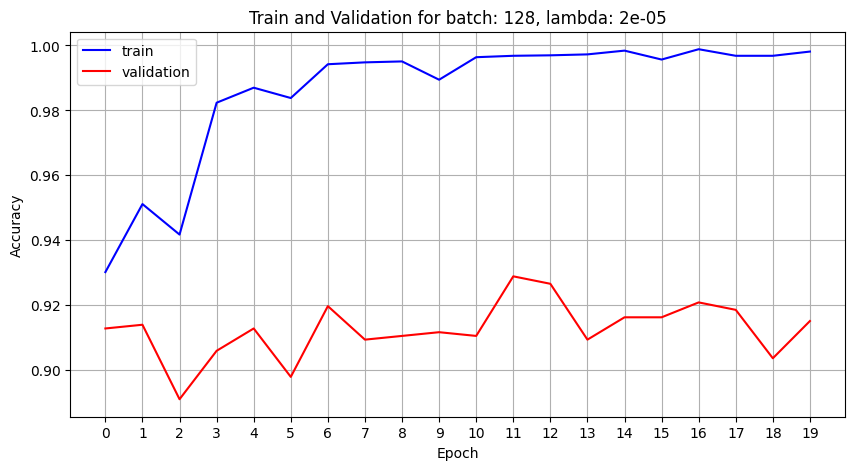

In [17]:
# rerun the best training loop.

# size = 128
# rate = 2e-5
# epoch = 20

# print(f"------------------------| batch size: {size}, learning rate: {rate}, epochs: {epoch} |------------------------------------")
# main(batch_size=size, learning_rate=rate, num_epochs=epoch)
